In [18]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

In [3]:
def calcular_metricas(y_train, y_test, pred_train, pred_test, ymodelo_nombre):
    """
    Calcula métricas de rendimiento para el modelo seleccionado.
    """

    # Métricas
    metricas_train = {
        "accuracy": accuracy_score(y_train, pred_train),
        "precision": precision_score(y_train, pred_train, average='weighted', zero_division=0),
        "recall": recall_score(y_train, pred_train, average='weighted', zero_division=0),
        "f1": f1_score(y_train, pred_train, average='weighted', zero_division=0)
    }
    metricas_test = {
        "accuracy": accuracy_score(y_test, pred_test),
        "precision": precision_score(y_test, pred_test, average='weighted', zero_division=0),
        "recall": recall_score(y_test, pred_test, average='weighted', zero_division=0),
        "f1": f1_score(y_test, pred_test, average='weighted', zero_division=0)
    }

    return pd.DataFrame({"train": metricas_train, "test": metricas_test})
        

In [4]:
df = pd.read_pickle('datos/customer_purchase_data_preprocesado.pkl').reset_index(drop=True)
df.head()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,Gender_Female,Gender_Male,ProductCategory_Beauty,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home Goods,ProductCategory_Sports,PurchaseStatus
0,-0.276761,-0.481934,-0.411185,0.005864,0.324752,0.596899,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,-1.564418,-1.612821,-1.090830,0.457694,0.324752,0.596899,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,-1.113738,1.158311,0.098548,0.068566,0.653061,0.275000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,-1.306887,1.423546,1.457838,0.924570,0.324752,0.639535,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,-0.856207,0.400133,1.457838,-0.626987,0.324752,0.275000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [5]:
x = df.drop(columns='PurchaseStatus')
y = df['PurchaseStatus']

In [6]:
x_train, x_test,y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=42, shuffle=True)
modelo_logistica = LogisticRegression()
modelo_logistica.fit(x_train,y_train)

y_pred_test = modelo_logistica.predict(x_test)
y_pred_test[:10]

y_pred_test_prob = modelo_logistica.predict_proba(x_test)[:,1] # probabilidad de esa predicción

In [7]:
print('Prediccion', y_pred_test[:3])
print('Probabiliadad de predicción', y_pred_test_prob[:3])

Prediccion [1 1 1]
Probabiliadad de predicción [0.58036283 0.85544783 0.88323851]


In [8]:
# y_pred_test_prob[:,1]

In [9]:
type(y_test)

pandas.core.series.Series

In [10]:
type(y_pred_test)

numpy.ndarray

In [11]:
df_pred = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_pred_test)], axis=1) 
df_pred.columns = ['Real', 'Predicho']
# aqui este reset index no es la mejor solucion porque perdemos los indices

In [12]:
df_pred

,Real,Predicho
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
303,0,1
304,1,0
305,1,1
306,1,1


Esto es para verlo, no es necesario siempre hacerlo

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
# tpr true positive ratio
# fpr false positive ratio
# umbral

Text(8.222222222222221, 0.5, 'Reales')

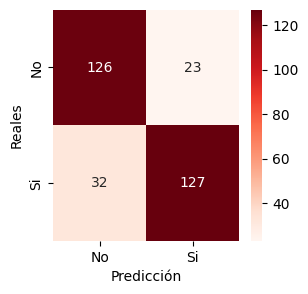

In [14]:
matriz_confusion = confusion_matrix(y_test,y_pred_test) #primero test, luego pred
plt.figure(figsize=(3,3))
etiquetas = ['No', 'Si']
sns.heatmap(matriz_confusion, 
            annot=True, # coloca números
            fmt='d',
            xticklabels=etiquetas,
            yticklabels=etiquetas,
            cmap='Reds') # formato entero
plt.xlabel(('Predicción'))
plt.ylabel(('Reales'))


Text(0, 0.5, 'Ratio de verdaderos positivos')

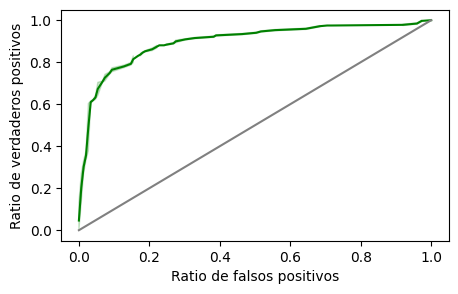

In [15]:
plt.figure(figsize=(5,3))
sns.lineplot(x=fpr, y=tpr, color='green')
sns.lineplot(x=[0,1], y=[0,1], color = 'grey')
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio de verdaderos positivos')

In [16]:
# mientras más se acerca a una línea de medio cuadrado, más idóneo es nuestro modelo.

In [17]:
df.head()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,Gender_Female,Gender_Male,ProductCategory_Beauty,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home Goods,ProductCategory_Sports,PurchaseStatus
0,-0.276761,-0.481934,-0.411185,0.005864,0.324752,0.596899,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,-1.564418,-1.612821,-1.090830,0.457694,0.324752,0.596899,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,-1.113738,1.158311,0.098548,0.068566,0.653061,0.275000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,-1.306887,1.423546,1.457838,0.924570,0.324752,0.639535,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,-0.856207,0.400133,1.457838,-0.626987,0.324752,0.275000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
